**Name:** Maria Master

**Class: INST 447 Spring 2024**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Programming Assignment 1

**Research Question:** Do people order different foods at different times of day? 

**Data Source:** Instacart

1. **Data**

The data in this dataset is collected from Instacart, an online grocery store delivery service. Customers can order their groceries online which are then gathered and packed at the grocery store, and delivered to the customer's preferred address. The dataset is made public and can be found here: (link).

The dataset used for this assignment is a simplified version of the original dataset. 

In [2]:
order_df = pd.read_csv('data/InstacartOrdersByDepartment.csv')
order_df

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33.0,5598.0
1,1,alcohol,32.0,5598.0
2,2,alcohol,5.0,5598.0
3,3,alcohol,3.0,5598.0
4,4,alcohol,2.0,5598.0
...,...,...,...,...
499,19,snacks,4959.0,118862.0
500,20,snacks,3397.0,118862.0
501,21,snacks,2782.0,118862.0
502,22,snacks,2216.0,118862.0


The observations for this dataset are Instcart orders associated with a specific departmentment and time of the day.

**Data Codebook:** 
- order_hour_of_day: The hour of the day when the order was placed (0 = 12am, 1 = 1am etc.)
- department: The department the products came from (e.g. alcohol, produce).
- num_orders_hour: The number of products ordered from this particular department during this particular hour.
- Tot_orders_dept: The total number of products ordered from this particular department across all hours of the day.

In [3]:
# number of rows and number of columns respectively
order_df.shape

(504, 4)

In [4]:
# Data type for each column in the dataset
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_hour_of_day  504 non-null    int64  
 1   department         504 non-null    object 
 2   num_orders_hour    504 non-null    float64
 3   tot_orders_dept    504 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


2. **Analysis**

In order to find out more about whether people order different foods in different times of day, here are a couple of basic things we will analyze from this dataset:

a) Unique departmental values

b) Most popular department 

c) Busiest hour of the day

In [5]:
# unique departmental values
order_df.department.unique()

array(['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks'],
      dtype=object)

To find all the unique departments in Instacart orders, we use the `.unique()` method. This returns an array of unique values, and doing so, we get the overview of all the different departments from which people order in Instacart such as alcohol, babies, produce, bakery, pets, etc.

In [6]:
# Most popular department through out the day
total_orders_per_dept = order_df[['department', 'tot_orders_dept']].drop_duplicates().reset_index(drop=True)
print(total_orders_per_dept)

total_orders_per_dept_sorted = total_orders_per_dept.sort_values(by='tot_orders_dept', ascending=False)
total_orders_per_dept_sorted.head(1)

         department  tot_orders_dept
0           alcohol           5598.0
1            babies          14941.0
2            bakery          48394.0
3         beverages         114046.0
4         breakfast          29500.0
5              bulk           1359.0
6      canned goods          46799.0
7        dairy eggs         217051.0
8              deli          44291.0
9   dry goods pasta          38713.0
10           frozen         100426.0
11        household          35986.0
12    international          11902.0
13     meat seafood          30307.0
14          missing           8251.0
15            other           1795.0
16           pantry          81242.0
17    personal care          21570.0
18             pets           4497.0
19          produce         409087.0
20           snacks         118862.0


,department,tot_orders_dept
19,produce,409087.0


To find the most popular department throughout the day, we look at the 'department' and 'tot_orders_dept' columns ('tot_orders_dept' column because it is the total orders placed in that department through the entire day), and we reset the original index (by dropping it) using the `.reset_index(drop=True)` method. Lastly, we want to find the department with the most purchases. Therefore, we sort the data in a descending order.

Doing so, we learn that the most popular department in Instacart is produce.

In [7]:
#Busiest hour of the day
total_per_hour = order_df.groupby('order_hour_of_day')['num_orders_hour'].sum()

#max vs idxmax
busiest_hour = total_per_hour.idxmax()

if busiest_hour < 12:
    time_period = "AM"
else:
    time_period = "PM"

print(f"The busiest hour of the day is {busiest_hour % 12} {time_period}.")

The busiest hour of the day is 2 PM.


To find the busiest hour of the day, we look at the total orders per hour. To find the total orders per hour, we grouped the data by 'order_hour_of_day' and found the sum of the number of orders per hour -- meaning, in the 0th hour, we had a total of X orders.

To find the busiest hour, we extracted the index of the max value in the total orders per hour by using the `.idxmax()` method.

Laslty, we wanted to find out at what time of the day this was and therefore, using an if-else statement, we printed AM if the hours were from 0 - 11 and PM if the hours were from 12 - 23.

So far, we know that people order from the produce department the most and the busiest time of the day is 2 PM. 

3. **Data Visualization**

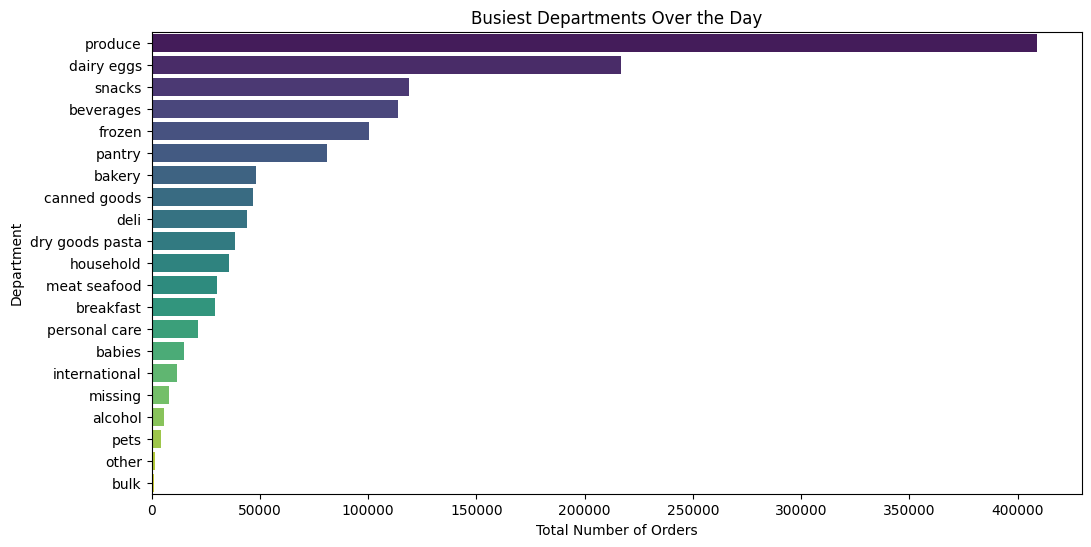

In [8]:
# A bar plot for busiest departments throughout the day
plt.figure(figsize=(12, 6))
sns.barplot(x='tot_orders_dept', y='department', data=total_orders_per_dept_sorted, palette="viridis")
plt.title('Busiest Departments Over the Day')
plt.xlabel('Total Number of Orders')
plt.ylabel('Department')
plt.show()

To visually see the differences between different departments throught out the day, we can plot the total number of orders across all the departments. To plot the visualization above, we used the barplot from the Seaborn module. For the data we used the total orders per deperatment sorted data which gives us the name of the department with the most purchases in a day. The x axis gives us the total number of orders and the y axis gives us the department name.

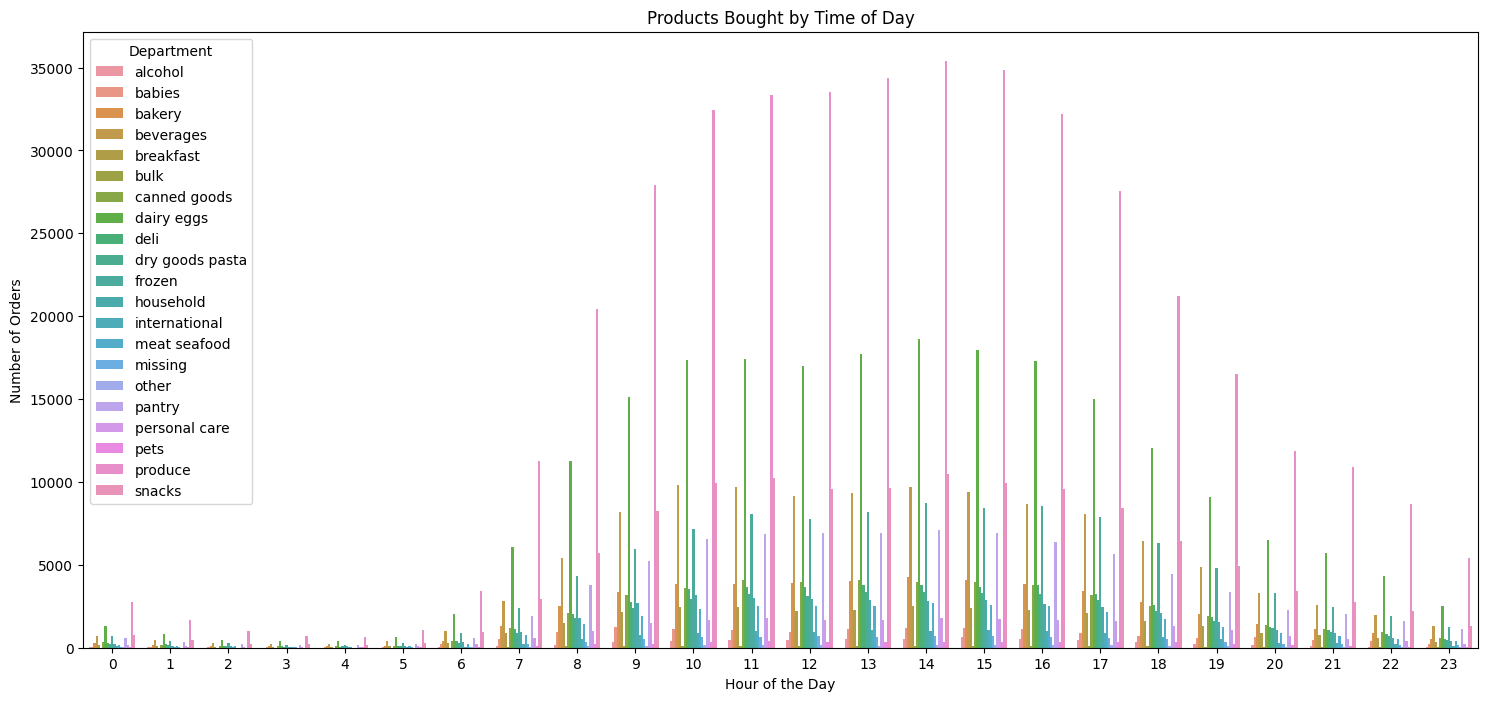

In [9]:
# A bar plot for busiest departments at each hour of the day
plt.figure(figsize=(18, 8))
sns.barplot(x='order_hour_of_day', y='num_orders_hour', hue='department', data=order_df)
plt.title('Products Bought by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.legend(title='Department', loc='upper left')
plt.show()

Previously, we found out that the busiest hour of the day was 2 PM and the busiest department was produce. In order to get the overall idea of how busy the departments are at each hour of the day, we created another bar plot using the bar plot from the Seaborn module. Each bar is colored differently according to the different department. The x axis starts from 0 all the way to 23 to indicate a 24 hour day and the y axis represents the total number of orders in each department. 

Below, let's zoom in on this bar plot to see the purchase pattern at night from 8 PM to 11 PM and from midnight to early morning, 12 AM to 6 AM accordingly.

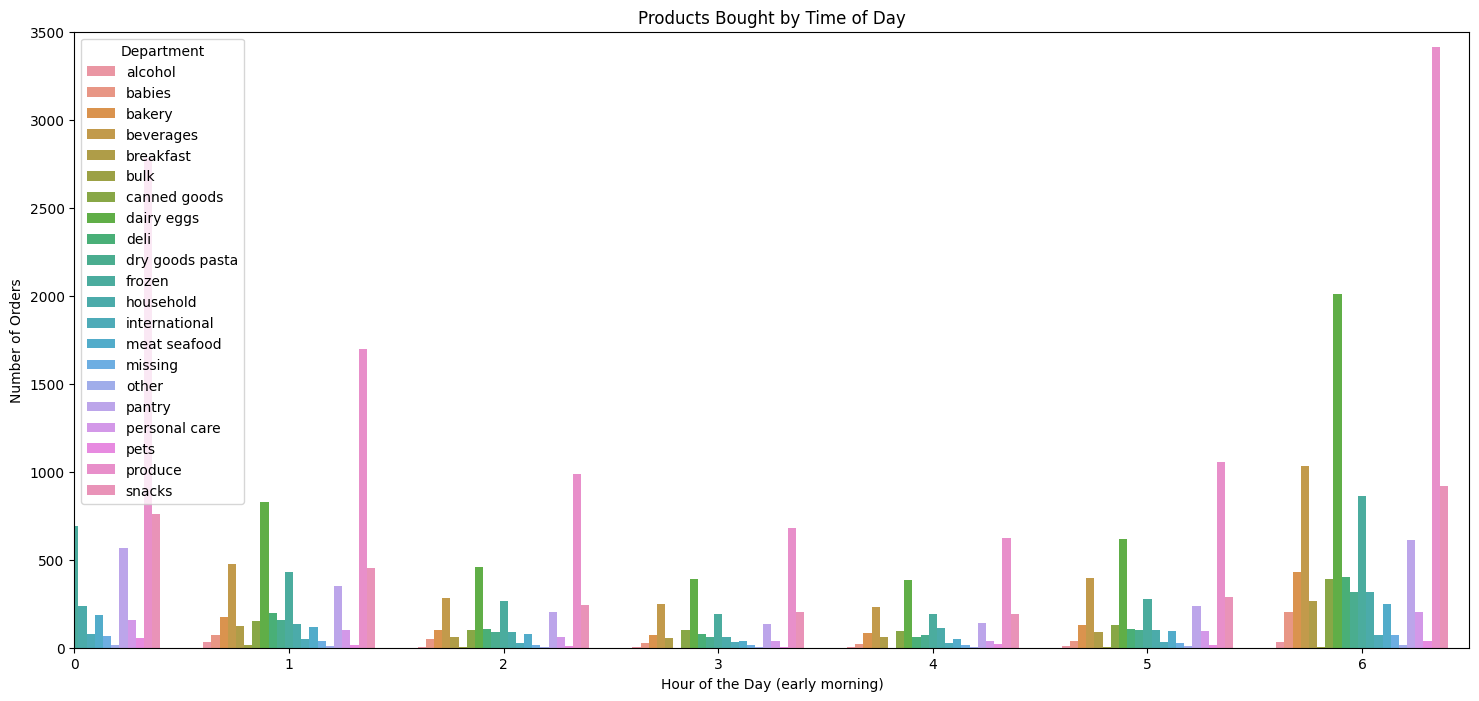

In [10]:
plt.figure(figsize=(18, 8))
sns.barplot(x='order_hour_of_day', y='num_orders_hour', hue='department', data=order_df)
plt.title('Products Bought by Time of Day')
plt.xlabel('Hour of the Day (early morning)')
plt.ylabel('Number of Orders')
plt.legend(title='Department', loc='upper left')

# morning
plt.xlim(0, 6.5)
plt.ylim(0, 3500)
plt.show()

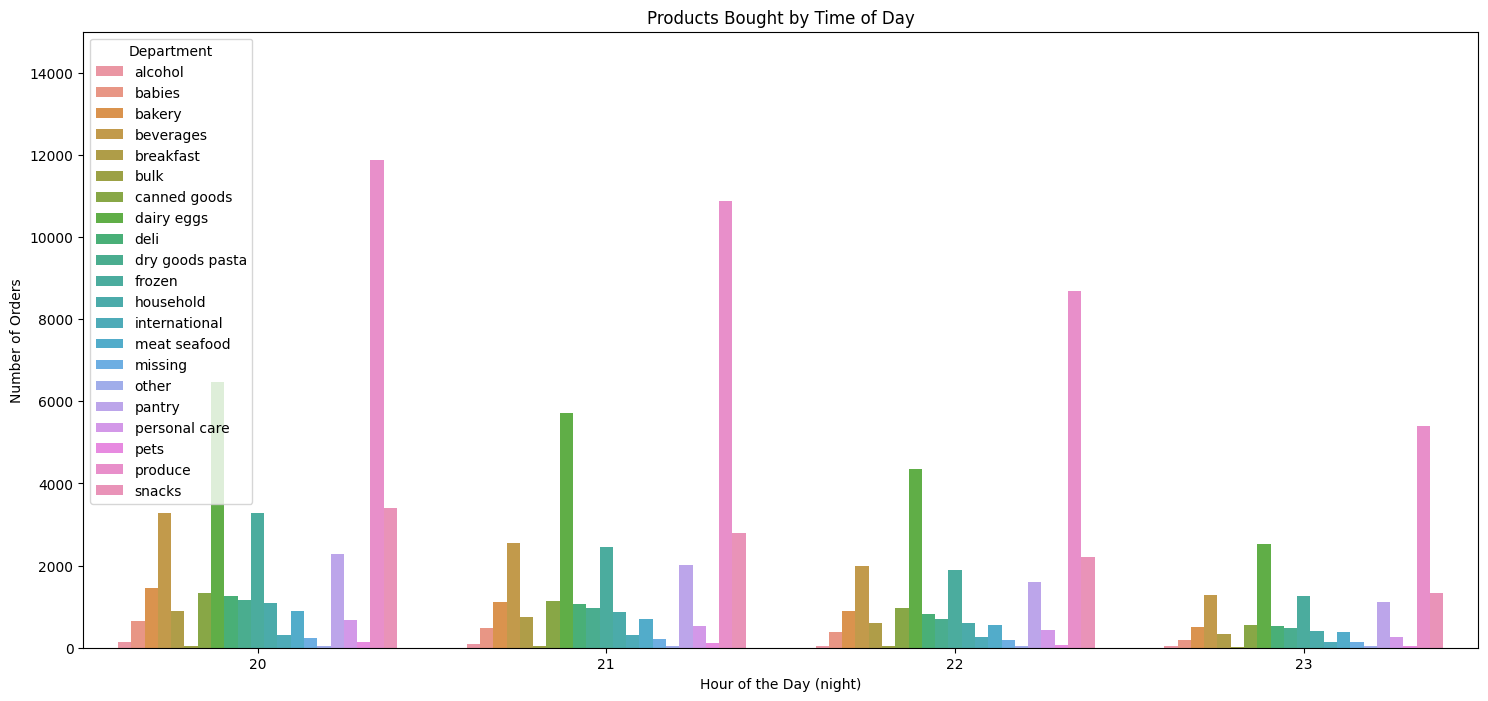

In [11]:
plt.figure(figsize=(18, 8))
sns.barplot(x='order_hour_of_day', y='num_orders_hour', hue='department', data=order_df)
plt.title('Products Bought by Time of Day')
plt.xlabel('Hour of the Day (night)')
plt.ylabel('Number of Orders')
plt.legend(title='Department', loc='upper left')

# night
plt.xlim(19.5, 23.5)
plt.ylim(0, 15000)
plt.show()

4. **Findings**

a. The produce department dominates all other departments throughout the entire day in Instacart. 
- This indicates a strong demand for healthy, fresh fruits and vegetables. This demand could be for several factors such as people planning their lunch, or incorporating healthy food items in their diet. 

b. The second busiest department is dairy and eggs. 
- This suggests that dairy and eggs are essential and in demand throughout the day. They also go hand in hand with produce in various meals as common consumption patterns. We also see that the dairy and eggs department see an increase in purchasing at 6 AM compared to the late night from 1 AM to 5 AM. This might typically indicate the breakfast pattern for people before starting their day. 

c. Produce is still the busiest department late at night. 
- The increased activity in the produce department from 12 AM to 6 AM may indicate a preference for late-night snacking on fresh and healthy options. This trend continues, with a peak at 6 AM, suggesting early-morning shoppers who prioritize fresh produce. It's interesting to see produce as the busiest department late at night than the snack department because often times when we think about food to eat late at night, we think of midnight snacks. However, there are other possible explanations for this behavior. For example, individuals working night shifts or unconventional hours may find it convenient to shop for groceries during their break or after finishing their work. They might be planning meals for their late-night or early-morning hours, and fresh produce could be a key component of their dietary preferences. Additionally, individuals who prioritize freshness in their produce might choose to shop late at night to access the latest deliveries. Late-night shoppers might also be planning and preparing meals for the next day. This could involve selecting ingredients like fresh produce. Lastly, Instacart is a 24/7 service. Therefore, this flexibility allows users to shop whenever they want, regardless of their range of schedules. 

d. Peak hours for product is midday. 
- This might indiate general grocery shopping habits, where people find it convenient to visit the produce department during midday hours and prepare meals for the day such as lunch. 

e. The snack department is popular throughout daytime. 
- Between 6 AM and 12 PM, the snacks department sell most of the items compared to late night and the peak is during midday. This gives us a peak in to eating habits such as people may engage in morning snacking, possibly as a quick energy boost between breakfast and lunch. They could also buy snacks during their study or work breaks. 

5. **Conclusion**

a. Takeaway message 
- We analyzed the shopping patterns in Instacart throughout the entire day (24 hours) and it indicates a consistent demand for fresh produce and essential items such as dairy, eggs and snacks throughout the day. These shopping patterns highlights a commitment to healthy eating habits throughout the day as well. For Instacart, they can use these patterns to enhance customer service by using targeted marketing strategies and discounts on certain products from various departments during peak hours. 

b. Limitations
- This dataset contains data for Instacart users which might indicate the fact that non-users of this service could have different shopping patterns throughout the day. 
- This dataset also lacks demographic details which does not allows us to use these interpretations on certain user categories across geogrphic profiles. 
- External factors such as seasonal food items or seasonal discount throughout different months could influence the shopping pattern. 
- Lastly, there are no details on the specific food items for each department. 

Conclusively, we discovered that produce, dairy and eggs and snacks are the three busiest departments throughout the day for Instacart users, and that the peak hours for all these departments are during the midday. 